{'Phone call': {'1+ day': 2, 'Less than 30mins': 17, 'Instantly resolved (1-5min)': 7, '2+ hours': 1, 'About 1hr': 8}, 'Only answering machine': {'About 1 hour': 1, 'Less than 30mins': 4, 'Instantly resolved (1-5min)': 3}, 'First chat bot, then human': {'1+ day': 1, 'About 1 hour': 1, 'Less than 30mins': 25, 'Instantly resolved (1-5min)': 5, '2+ hours': 1}, 'Only chat bot (AI)': {'1+ day': 1, 'About 1 hour': 1, 'Less than 30mins': 8, 'Instantly resolved (1-5min)': 10, '1+ week': 1}, 'In-store or booth visit': {'Instantly resolved (1-5min)': 1}, 'Human (livechat)': {'1+ day': 2, 'About 1 hour': 3, 'Less than 30mins': 14, 'Instantly resolved (1-5min)': 8}, 'Email': {'1+ day': 15, '2+ hours': 2, 'Instantly resolved (1-5min)': 6, 'Less than 30mins': 10, '1+ week': 1, 'About 1hr': 3}, 'Answering machine, then human call': {'About 1 hour': 2, 'Less than 30mins': 9, 'Instantly resolved (1-5min)': 1, 'About 1hr': 2}}





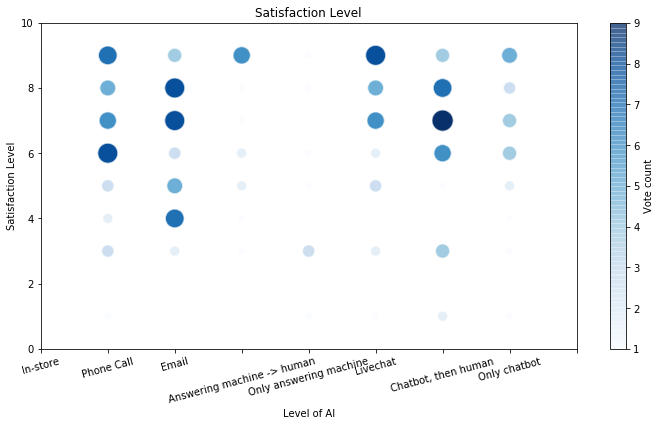

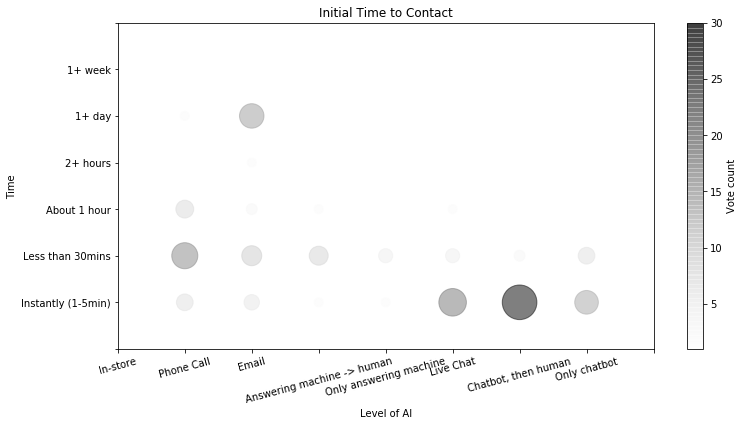

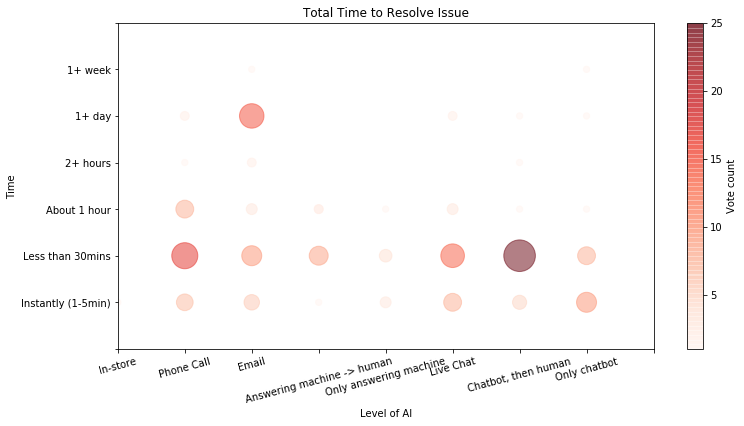

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def main():
    #add file path here    
    dataframe1 = pd.read_csv('/Users/milean/Downloads/Customer Service Survey_NEW (Responses) - Form Responses 1 (9).csv')
    plot_reg_analysis(dataframe1)

def plot_reg_analysis(df):
    # Satisfaction level dictionary with examples of content
    sat_levels = {
#         "Human (livechat)":[],
#         "Only chat bot (AI)":[],
#         "First chat bot, then human":[],
#         "Automated system, then human":[],
#         "Automated system [ie, voice system]":[],
    }
    
    vote_count = {}
    initial_times = {}
    final_times = {}
    for index, row in df.iterrows():
        (sat_levels, initial_times, final_times, vote_count) = process_row(row, sat_levels, initial_times, final_times, vote_count, is_AI=True)
        (sat_levels, initial_times, final_times, vote_count) = process_row(row, sat_levels, initial_times, final_times, vote_count, is_AI=False)
    
    # make 2 plots
    plot_satisfaction_level_linear_reg(sat_levels, vote_count)
    plot_time_linear_reg(initial_times, final_times)
    

# MERGE KEYS THAT ARE THE SAME
def merge_keys(key):
    if ("Phone call" == key or "Direct Phone call (non-answering machine)" == key):
        return "Phone call"
    elif ("Automated voice system, then human voice call" == key or "Automated system, then human" == key or
                  "Answering machine, then human call" == key or "Answering machine, then human voice call" == key
                 ):
        return "Answering machine, then human call"
    elif ("Automated system [ie, voice system]" == key or key == "Automated voice system" or 
          "Only answering machine" == key):
        return "Only answering machine"

    elif ("Human (livechat)" == key or "Live chat" in key):
        return "Human (livechat)"
    else:
        return key

    
# Populate sat levels, initial times, final times, and vote count from this row
def process_row(row, sat_levels, initial_times, final_times, vote_count, is_AI=True):
    if (is_AI):
        who = (row[2])
        i_time =(row[3])
        f_time =(row[7])
        sat_level = (row[4])
    else:
        who = (row[8])
        i_time =(row[13])
        f_time =(row[13])
        sat_level = (row[10])
    
    if (not who == who):
        #print "index %s was %s" % (index, who
        return (sat_levels, initial_times, final_times, vote_count)

    who = merge_keys(who)

    # SATISFACTION LVL
    if (who not in sat_levels.keys()):
        sat_levels[who] = [sat_level]
    else:
        sat_levels[who].append(sat_level)
        
    
    #
    # VOTE COUNT INCREASE
    if (who not in vote_count.keys()):
        vote_count[who] = {sat_level:1}
    else:
        if (sat_level not in vote_count[who].keys()):
            vote_count[who][sat_level] = 1
        else:
            vote_count[who][sat_level] += 1

    #
    # INITIAL TIMES
    #
    if (who not in initial_times.keys()):
        initial_times[who] = {i_time:1}
    else:
        if (i_time not in initial_times[who].keys()):
            initial_times[who][i_time] = 1
        else:
            initial_times[who][i_time] += 1

    #
    # FINAL TIMES
    #
    if (who not in final_times.keys()):
        final_times[who] = {f_time:1}
    else:
        if (f_time not in final_times[who].keys()):
            final_times[who][f_time] = 1
        else:
            final_times[who][f_time] += 1

    return (sat_levels, initial_times, final_times, vote_count)
        
    
# Map text of the "who category" to a Y value for Scatterplot
def plot_satisfaction_level_linear_reg(sat_levels, vote_count):
    linear_reg = []
    for key in sat_levels.keys():
        for sat_lvl in sat_levels[key]:
            if ("In-store or booth visit" == key):
                linear_reg.append( (sat_lvl, 0, vote_count[key][sat_lvl] ) )
            elif ("Phone call" == key):
                linear_reg.append( (sat_lvl, 1, vote_count[key][sat_lvl] ) )
            elif ("Email" == key):
                linear_reg.append( (sat_lvl, 2 , vote_count[key][sat_lvl] ) )
            elif ("Answering machine, then human call" == key):
                linear_reg.append( (sat_lvl, 3 , vote_count[key][sat_lvl] ) )
            elif ("Only answering machine" == key):
                linear_reg.append( (sat_lvl, 4 , vote_count[key][sat_lvl] ) )

            elif ("Human (livechat)" == key):
                linear_reg.append( (sat_lvl, 5 , vote_count[key][sat_lvl] ) )             

            elif ("First chat bot, then human" == key):
                linear_reg.append( (sat_lvl, 6 , vote_count[key][sat_lvl] ) )
            elif ("Only chat bot (AI)" == key):
                linear_reg.append( (sat_lvl, 7 , vote_count[key][sat_lvl] ) )
            else:
                print "unknown key %s " % key
                
    linear_reg_df = pd.DataFrame(
        linear_reg, 
        columns=['Satisfaction Level', "Level of AI", "Vote count"]
    )
    ax = linear_reg_df.plot.scatter(
        title="Satisfaction Level",
        x='Level of AI', 
        y='Satisfaction Level', 
        xlim=(0,8), 
        ylim=(0,10),
        c='Vote count',
        colormap='Blues',
        edgecolors="white",
        alpha=0.5,
        s=linear_reg_df['Vote count']*50 ,
        rot=15,
        figsize=(12,6),
        sharex=False,
#         fit_reg=True
    )
    ax.set_xticklabels(("In-store", "Phone Call", "Email", "Answering machine -> human", "Only answering machine", "Livechat", "Chatbot, then human", "Only chatbot"))

    
# Map text of time to a Y value for Scatterplot
def get_time_y_val(time_str):
    if ('Instantly (1-5min)' in time_str or "Instantly resolved (1-5min)" in time_str):
        return 1
    elif ("Less than 30mins" in time_str):
        return 2
    elif ('About 1 hour' in time_str or 'About 1hr' in time_str):
        return 3
    elif ('2+ hours' in time_str):
        return 4
    elif ("1+ day" in time_str):
        return 5
    elif ("1+ week" in time_str):
        return 6
    else:
        print "invalid time str %s" % (time_str)
        return -1
    

def get_time_yvalue(times):
    linear_reg = []
    for who in times.keys():
#         print who
#         print times[who]
        who = merge_keys(who)
        for time in times[who].keys():
            y = get_time_y_val(time)
#             print "%s - %s" % (time, times[key][time])
            if ("In-store or booth visit" == who):
                linear_reg.append( (y, 0, times[who][time] ) )
            elif ("Phone call" == who):
                linear_reg.append( (y, 1, times[who][time] ) )
            elif ("Email" == who):
                linear_reg.append( (y, 2 , times[who][time] ) )
            elif ("Answering machine, then human call" == who):
                linear_reg.append( (y, 3 , times[who][time] ) )
            elif ("Only answering machine" == who):
                linear_reg.append( (y, 4 , times[who][time] ) )

            elif ("Human (livechat)" == who):
                #print "who %s y %s time %s times[who][time] %s" % (who, y, time, times[who][time])
                linear_reg.append( (y, 5 , times[who][time] ) )             

            elif ("First chat bot, then human" == who):
                linear_reg.append( (y, 6 , times[who][time] ) )
            elif ("Only chat bot (AI)" == who):
                linear_reg.append( (y, 7 , times[who][time] ) )
            else:
                print "unknown who %s " % who
                
    return linear_reg
    
def plot_time_linear_reg(initial_times, final_times):
    print final_times
    print "\n\n"
    initial_linear_reg = get_time_yvalue(initial_times)
    final_linear_reg = get_time_yvalue(final_times)

#     print final_linear_reg

    initial_linear_reg_df = pd.DataFrame(
        initial_linear_reg, 
        columns=['Time', "Level of AI", "Vote count"]
    )
    ax = initial_linear_reg_df.plot.scatter(
        title="Initial Time to Contact",
        x='Level of AI', 
        y='Time', 
        xlim=(0,8), 
        ylim=(0,7),
        c='Vote count',
        alpha=0.5,
        s=initial_linear_reg_df['Vote count']*40 ,
        rot=15,
        figsize=(12,6),
        sharex=False,
    )
    ax.set_xticklabels(("In-store", "Phone Call", "Email", "Answering machine -> human", "Only answering machine", "Live Chat", "Chatbot, then human", "Only chatbot"))
    ax.set_yticklabels(("", 'Instantly (1-5min)', "Less than 30mins", 'About 1 hour', '2+ hours' , "1+ day", "1+ week")) 
                
    final_linear_reg_df = pd.DataFrame(
        final_linear_reg, 
        columns=['Time', "Level of AI", "Vote count"]
    )
    axx = final_linear_reg_df.plot.scatter(
        title="Total Time to Resolve Issue",
        x='Level of AI', 
        y='Time', 
        xlim=(0,8), 
        ylim=(0,7),
        c='Vote count',
        colormap='Reds',
        alpha=0.5,
        s=final_linear_reg_df['Vote count']*40 ,
        rot=15,
        figsize=(12,6),
        sharex=False,
    )
    axx.set_xticklabels(("In-store", "Phone Call", "Email", "Answering machine -> human", "Only answering machine", "Live Chat", "Chatbot, then human", "Only chatbot"))
    axx.set_yticklabels(("", 'Instantly (1-5min)', "Less than 30mins", 'About 1 hour', '2+ hours' , "1+ day", "1+ week")) 
    
main()